In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
dp = [
    "#1c1c3c",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

In [2]:
df = pd.read_csv("../../../data/friends/FriendsLines.csv")
df["Character"] = df["Character"].str.lower()
df = df[df["Character"]!="[scene"]

In [3]:
df.head()

,Character,Line
0,written by,Marta Kauffman & David Crane
1,transcribed by,guineapig
2,additional transcribing by,Eric Aasen
3,(note,The previously unseen parts of this episode a...
5,monica,There's nothing to tell! He's just some guy


In [4]:
df_grouped = df.groupby("Character")["Line"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)

In [5]:
df_grouped["Character"] = df_grouped["Character"].apply(lambda x: x[0].upper() + x[1:])
df_grouped

,Character,cuenta
0,Rachel,9079
1,Ross,9028
2,Chandler,8328
3,Monica,8216
4,Joey,8156
5,Phoebe,7364
6,Mike,359
7,All,338
8,Richard,247
9,Janice,217


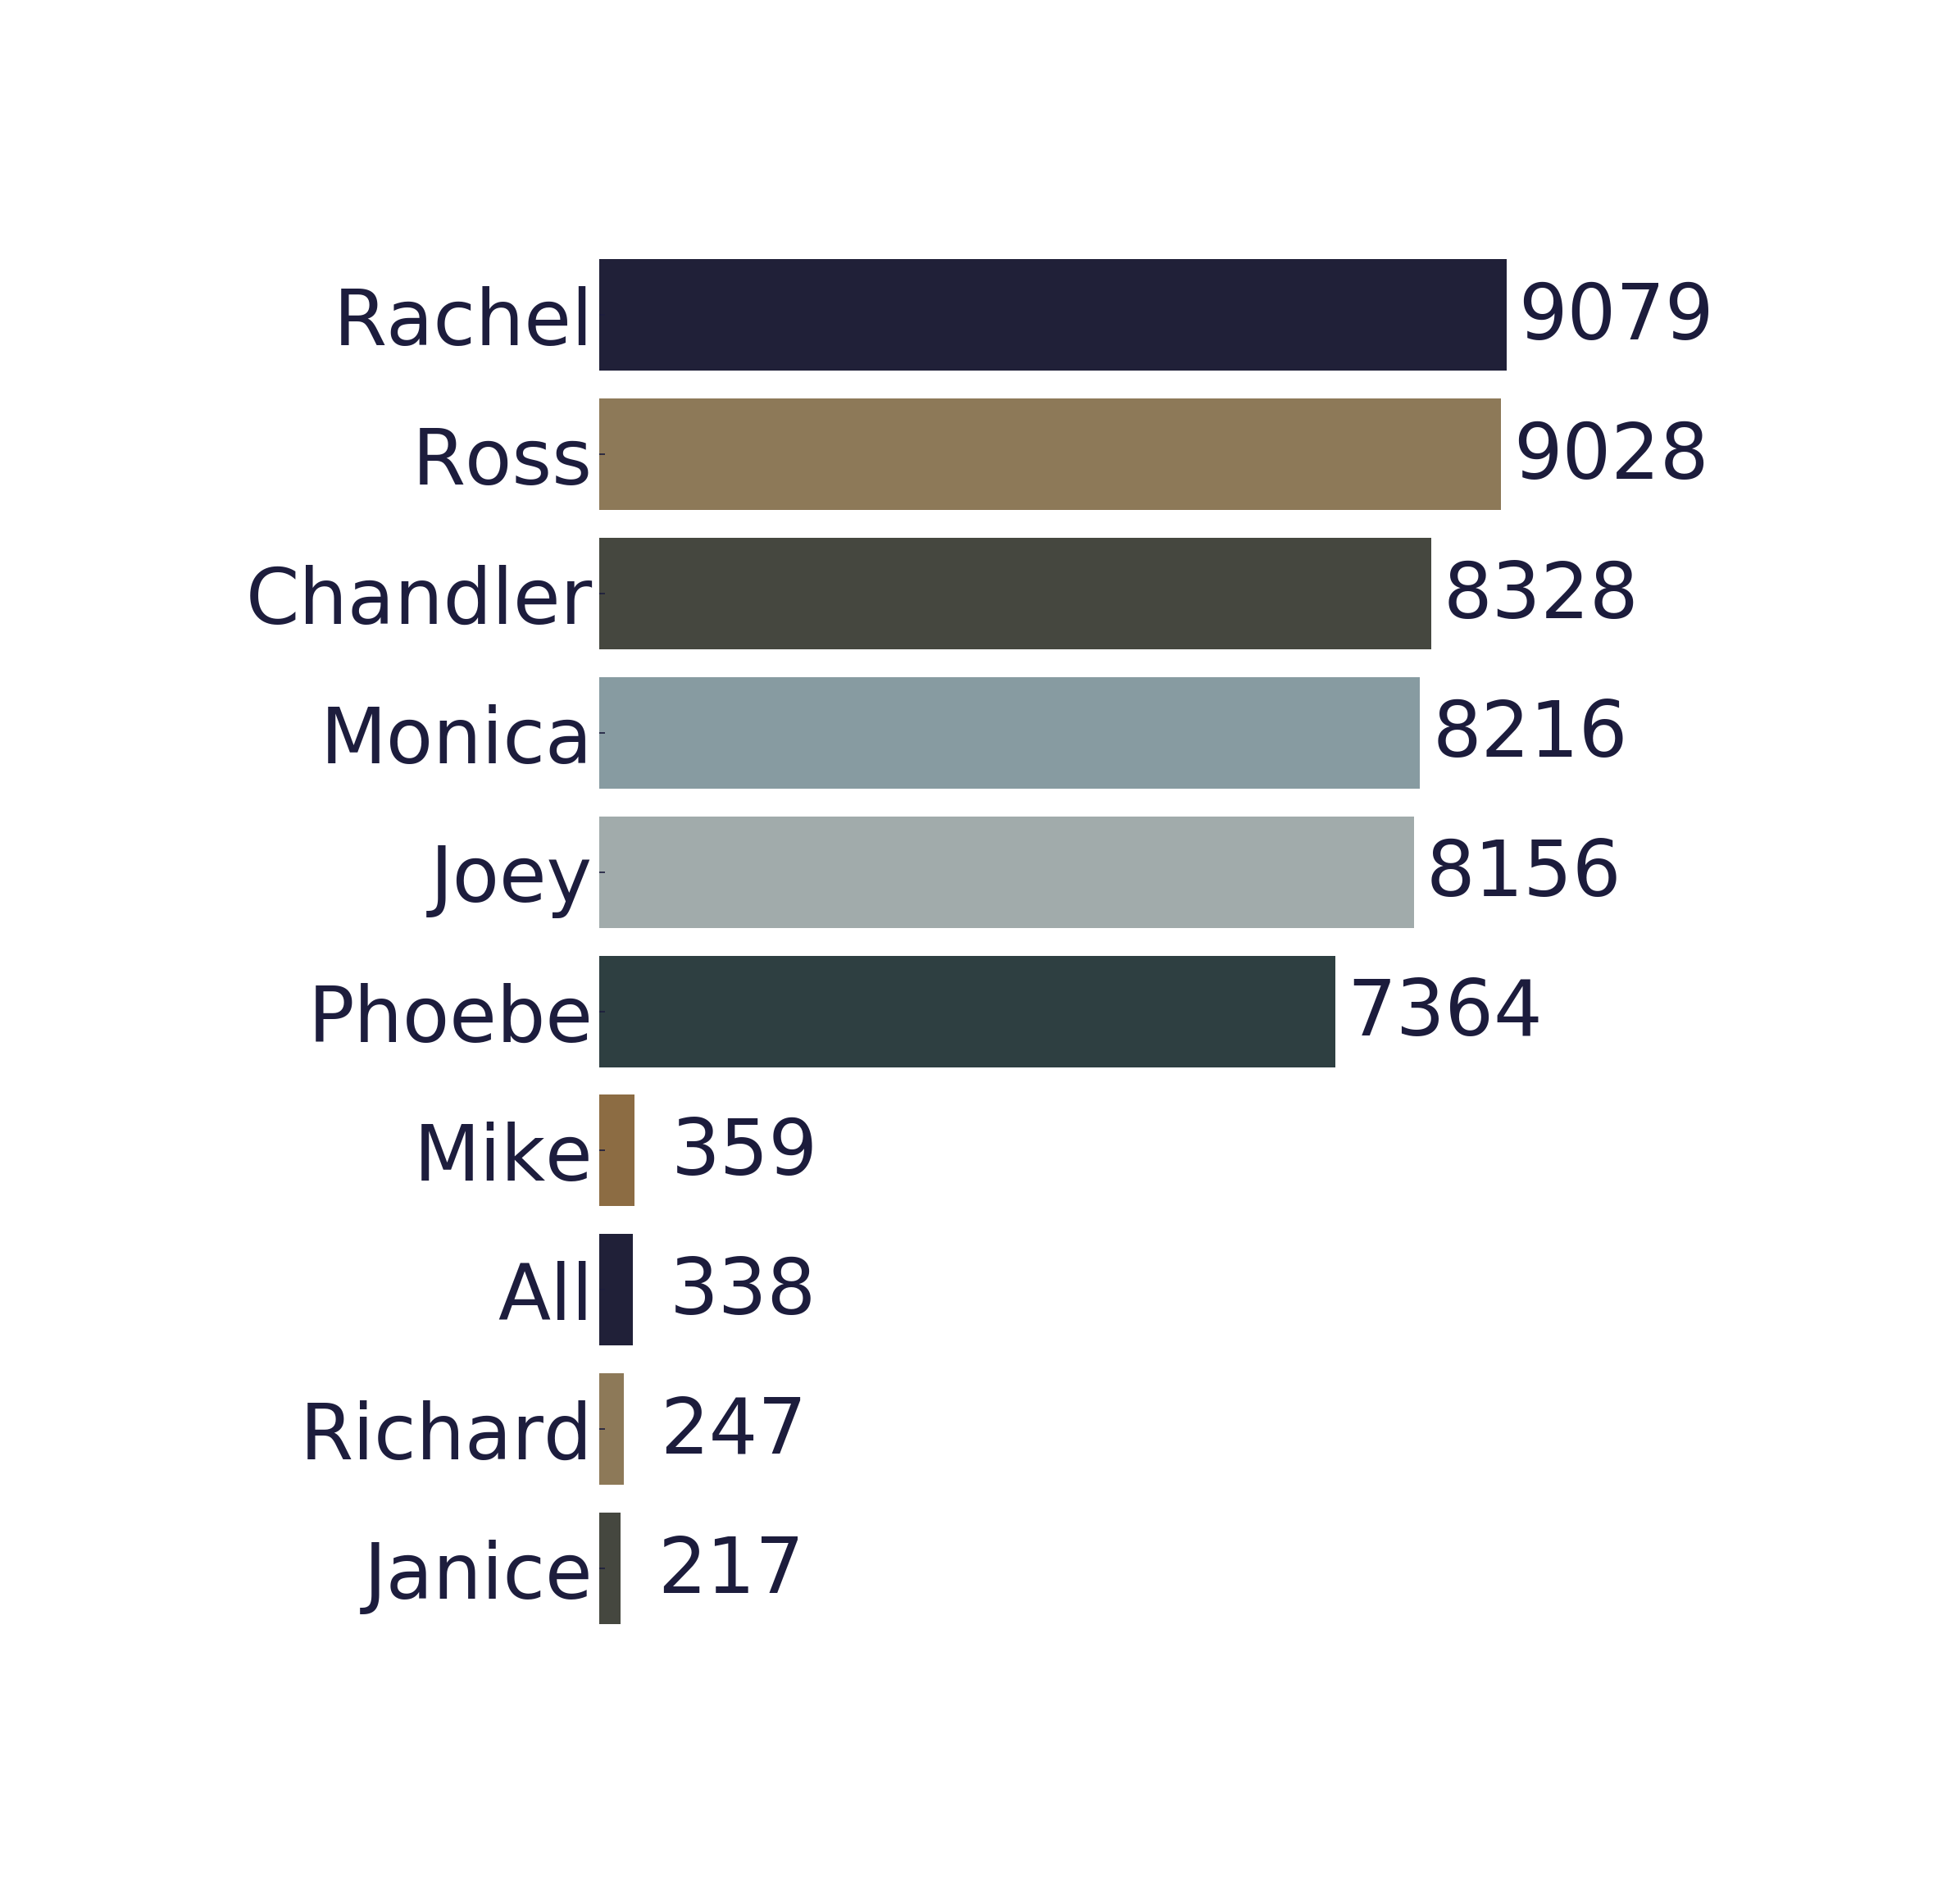

In [6]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Character", x="cuenta", orient="h", data=df_grouped, palette = dp)
plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.17
horizontal_offset = 1100

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in df_grouped.head(10).iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1c1c3c', 
            ha="center", 
            size=45)
    
plt.savefig(f'personajes_friends_mas_hablan.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

# Segundo dataset 
### https://www.kaggle.com/shilpibhattacharyya/friends-sitcom-dataset

In [7]:
df2 = pd.read_csv("../../../data/friends/friends_dataset.csv").dropna()

In [8]:
df2

,Unnamed: 0,Location,Scene,Season,Speaker,Text
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!
...,...,...,...,...,...,...
93330,93330,Camera fades to one of the band members playin...,"The chapel is full of guest, A groomsmen esco...",4,Chandler,What we did last night was....
93331,93331,Monica and Chandler's apartment,Chandler is watching TV and Monica is cooking,10,Chandler,I'm telling ya! It's gonna happen. Next year i...
93332,93332,Monica and Rachel's,"everyone is sitting around the kitchen table,...",1,Ross,Yeah.
93333,93333,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Ross,What are you doing?


In [9]:
df2.loc[df2['Location'].str.contains('Monica'), 'Location'] = "Monica's apartment"
df2.loc[df2['Location'].str.contains('Joey'), 'Location'] = "Joey's apartment"
df2.loc[df2['Location']=='Chandler', 'Location'] = "Joey's Apartment"
df2.loc[df2['Location']=='The Hallway', 'Location'] = "The hallway"
df2.loc[df2['Location']=='A Restaurant', 'Location'] = "A restaurant"
df2.loc[df2['Location']=='The Hospital', 'Location'] = "The hospital"
df2.loc[df2['Location']=='A Street', 'Location'] = "A street"

In [10]:
df_lugares = df2.groupby("Location")["Season"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)
df_lugares

,Location,cuenta
0,Monica's apartment,31044
1,Central Perk,15910
2,Joey's apartment,10729
3,The hallway,1178
4,Ross's apartment,968
5,A restaurant,652
6,The hospital,588
7,Joey's Apartment,586
8,Phoebe's apartment,492
9,A street,404


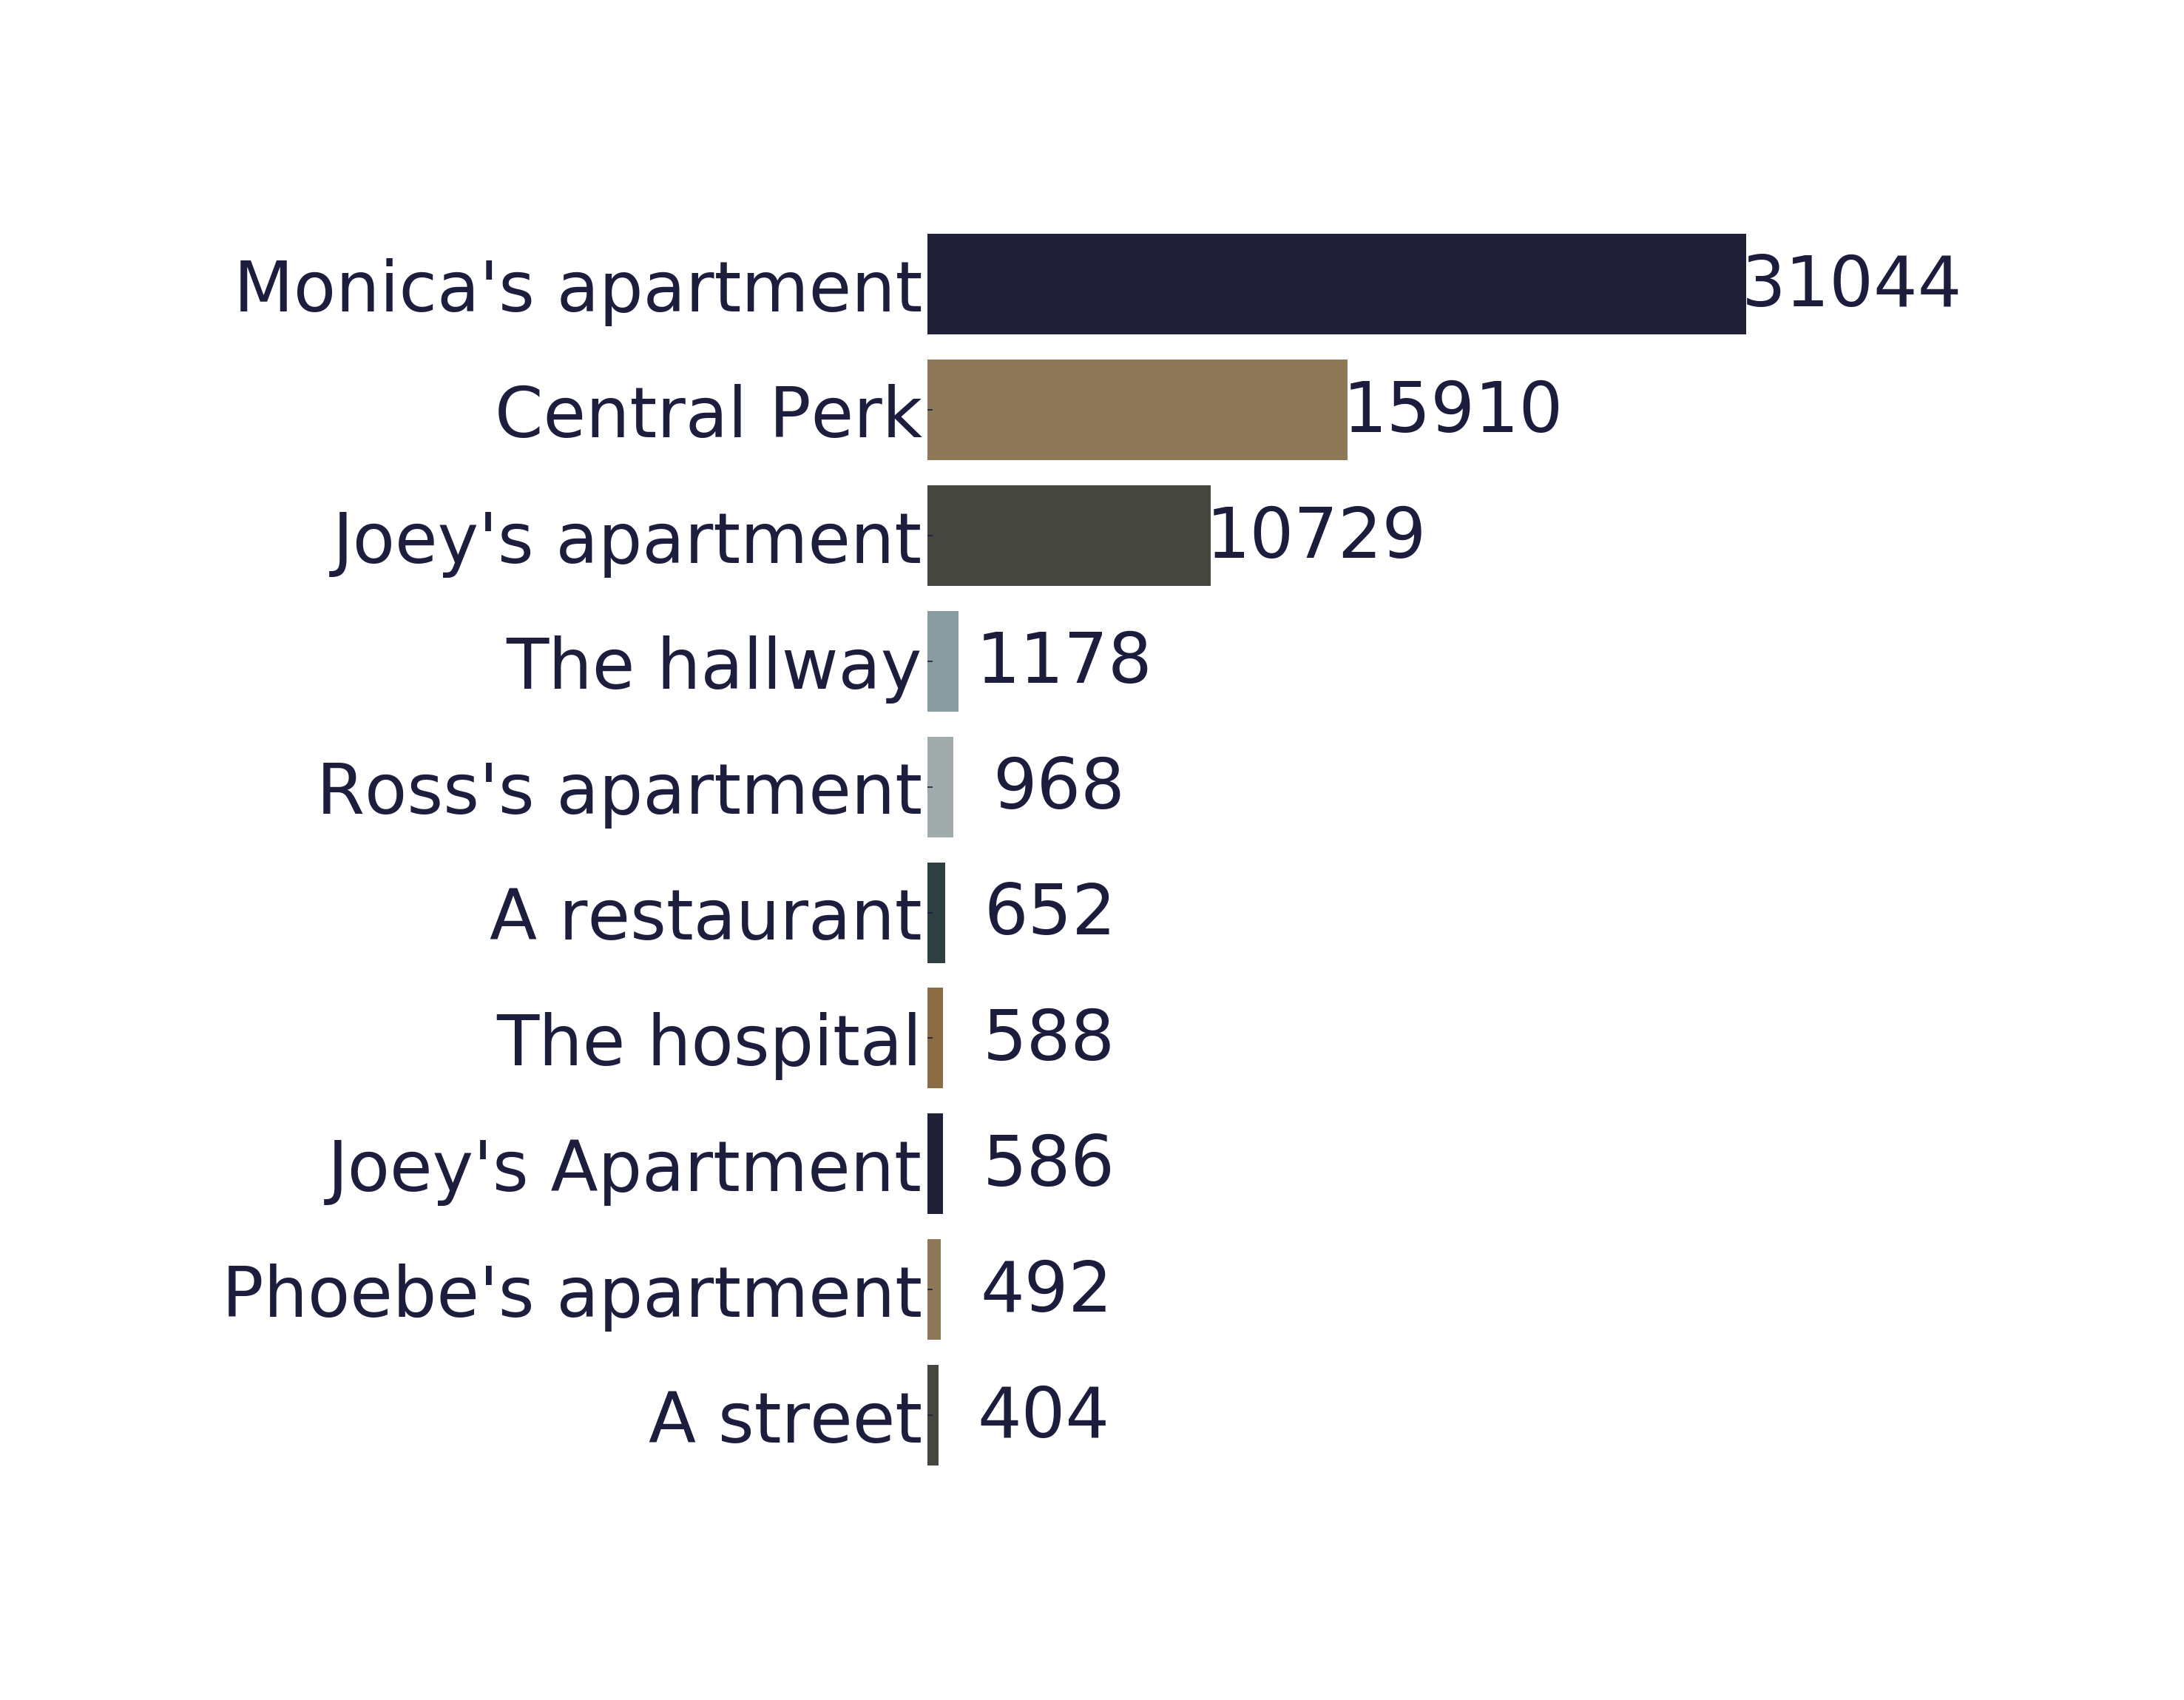

In [11]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Location", x="cuenta", orient="h", data=df_lugares, palette = dp)
plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)



# jugar con estos valores
vertical_offset = 0.17
horizontal_offset =4000

ax.tick_params(axis='both', which='major', labelsize=45)
for index, row in df_lugares.iterrows():
    ax.text(row["cuenta"] + horizontal_offset,index+vertical_offset, # posicion
            row["cuenta"], # texto
            color='#1c1c3c', 
            ha="center", 
            size=45)
    
plt.savefig(f'lugares_friends.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()

In [14]:
df2.loc[df2['Text'].str.contains('How you doin'), 'Text']

2543                  I'm doin' good, baby. How you doin'?
10965    Yes! I will! Absolutely!  Hello, Rachel. Hi, J...
13806                                       How you doing?
15573                                  Hey! How you doin’?
15965                             Oh, I do.  How you doin?
16974                             Oh, I do.  How you doin?
29648    Yeah, I can’t live with Joey once the baby com...
31182                                Okay!  How you doin'?
31409                                  Hey! How you doing?
41297                                Okay!  How you doin'?
44751                                       How you doin'?
48320    Yeah. Well, so far yeah. But it's tough you kn...
50798                             Oh, I do.  How you doin?
54846                                  Hey! How you doin’?
59794                           hey, fella! How you doing?
69178                                        How you doin?
71687                                       How you doin

In [18]:
df_ik = df2.loc[df2['Text'].str.contains('Ross'), :]
df_ik.groupby("Speaker")["Season"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)

,Speaker,cuenta
0,Rachel,828
1,Joey,547
2,Monica,345
3,Phoebe,304
4,Chandler,268
5,Ross,126


In [ ]:
df_ik = df_ik.groupby("Speaker")["Season"].count().to_frame("cuenta").sort_values("cuenta", ascending=False).reset_index().head(10)
df_lugares

In [ ]:
#https://yashuseth.blog/2017/12/29/data-analysis-lead-character-of-friends-data-science/